# Optimal Portfolio of a risk-free and two risky assets

## Investors Details

|Expected Return | Risk Aversion | Risk | VaR| Investment Horizon | 
|----------------|---------------|-------|---|-------------------|
|12% | Moderate | 20% | .02| 5 years|

## Risky Assets Selection

### Constants for the market

In [21]:
#risk free rate
rf_rate = .09
coeff_A = 3.6

### Importing the necessary libraries

In [2]:
import pandas as pd
import missingno as msno
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing historical stocks data of DSE

In [3]:
df = pd.read_csv('../data/total_daily_data.csv', header = 0)
df = df.set_index(pd.to_datetime(df['date'])).drop('date', axis=1)
df.info()

c:\users\rapples\desktop\quantitative\portfolio-analysis\sy-portfolio\venv\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 995836 entries, 2019-02-03 to 2019-06-30
Data columns (total 6 columns):
symbol    995836 non-null object
open      995836 non-null float64
high      995836 non-null float64
low       995836 non-null object
close     995836 non-null float64
volume    995835 non-null object
dtypes: float64(3), object(3)
memory usage: 41.8+ MB


In [4]:
df_sorted = df.sort_index()
df_sorted.tail(10)

,symbol,open,high,low,close,volume
date,,,,,,
2019-08-29,BATBC,1224.0,1230.00,1205,1209.80,32499
2019-08-29,METROSPIN,7.7,7.80,7.5,7.60,365479
2019-08-29,IFADAUTOS,70.2,70.20,67.6,67.90,294887
2019-08-29,DSEX,5140.0,5144.96,5093.19,5095.78,4.02918e+07
2019-08-29,TRUSTB1MF,4.2,4.30,4.1,4.20,546418
2019-08-29,IFIC,9.8,9.80,9.6,9.60,467680
2019-08-29,BAYLEASING,15.0,15.00,14.1,14.70,15217
2019-08-29,PROGRESLIF,88.1,90.50,88.1,89.80,3506
2019-08-29,BATASHOE,980.0,980.00,968,978.20,913


symbol,00DS30,00DSEGEN,00DSES,00DSEX,01.Bank,02.Cement,03.Ceramics_Sector,04.Engineering,05.Financial_Institutions,06.Food_&_Allied,...,VAMLBDMF1,VAMLRBBF,VFSTDL,WATACHEM,WMSHIPYARD,WONDERTOYS,YPL,ZAHEENSPIN,ZAHINTEX,ZEALBANGLA
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1843.18,4342.31,1174.02,4941.52,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,213.5,53.6,68.25,NaN,NaN,16.6,8.5
2015-01-05,1844.42,4342.31,1176.31,4926.41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,211.6,55.4,68.25,NaN,NaN,16.4,8.4
2015-01-06,1859.07,4342.31,1186.51,4969.67,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,212.5,55.4,68.25,NaN,NaN,16.4,8.5
2015-01-07,1857.15,4342.31,1183.56,4963.66,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,209.3,55.4,68.25,NaN,NaN,16.4,8.3
2015-01-08,1854.14,4342.31,1181.71,4968.71,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,210.1,54.9,68.25,NaN,NaN,16.6,8.3


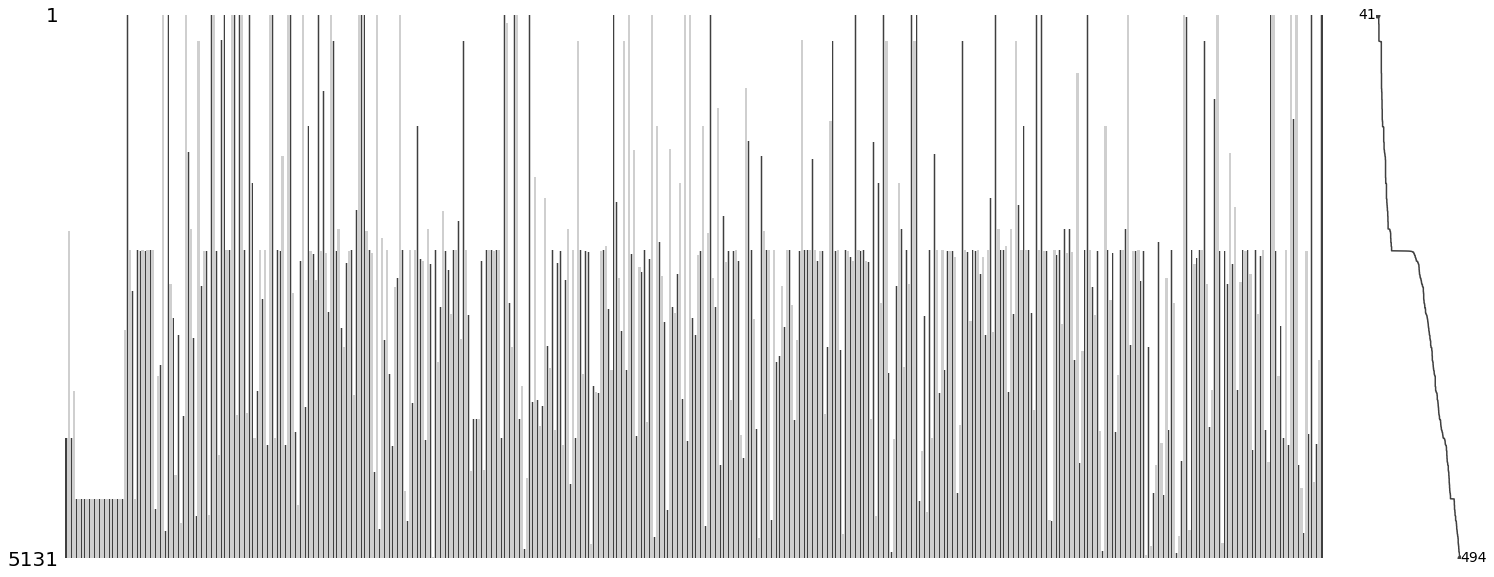

In [5]:
df_pivoted = pd.pivot_table(df_sorted, values='close', index='date', columns='symbol')
df_pivoted = df_pivoted.fillna(method="ffill")
msno.matrix(df_pivoted)
df_pivoted = df_pivoted.loc['2015-01-01':, :]
df_pivoted.head()

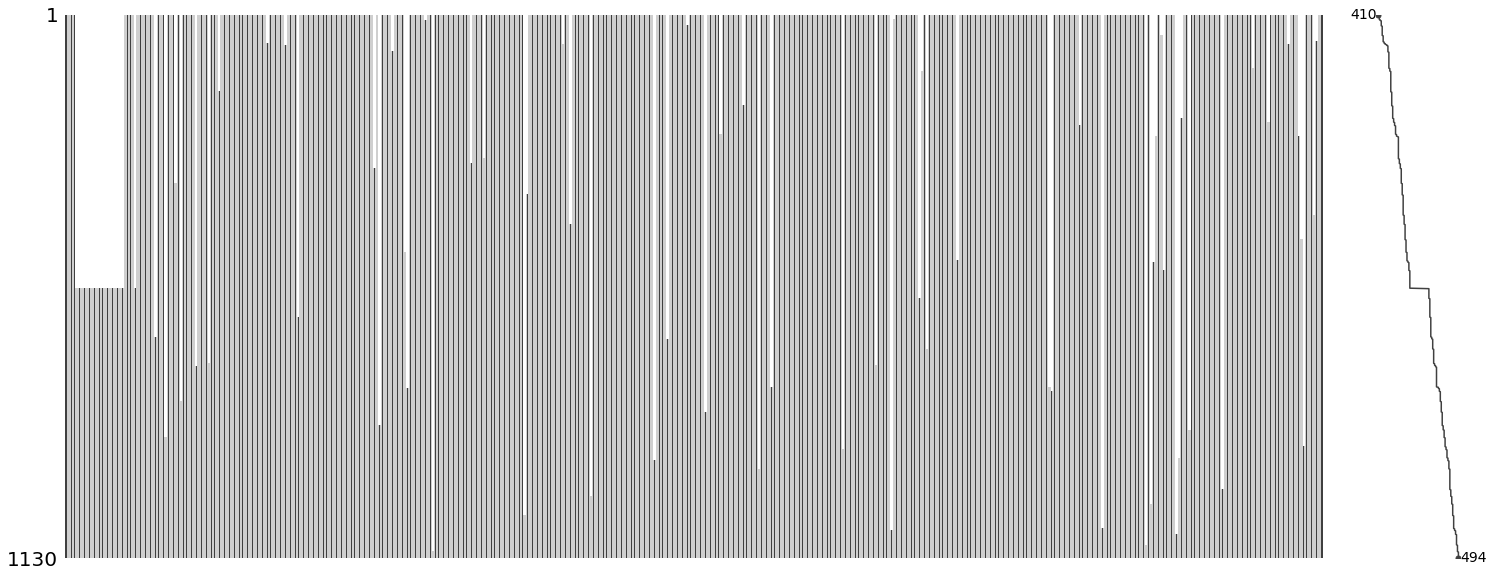

In [6]:
msno.matrix(df_pivoted)

### Calculating returns, standard deviations and sharpe ratios

In [8]:
df_rss = pd.DataFrame(columns=['Symbol', 'Annual Return', 'Standard Deviation', 'Sharpe Ratio']) 
for column in df_pivoted.columns:
    if len(df_pivoted[column].dropna()) > 502: 
        ann_return = (((1+df_pivoted[column].dropna().pct_change(1)).cumprod().iloc[-1])**(251/len(df_pivoted[column].dropna()))) -1 
        ann_std = df_pivoted[column].dropna().pct_change(1).std() * (252**.5)
        shrp = (ann_return - rf_rate) / ann_std
        df_rss = df_rss.append({'Symbol': column, 'Annual Return': ann_return, 'Standard Deviation': ann_std, 'Sharpe Ratio': shrp}, ignore_index= True)
df_rss = df_rss.set_index('Symbol')
top_50 = df_rss.sort_values('Sharpe Ratio', ascending= False).iloc[:50]
top_50_symbol = top_50.index.unique()
top_50
    

c:\users\rapples\desktop\quantitative\portfolio-analysis\sy-portfolio\venv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


,Annual Return,Standard Deviation,Sharpe Ratio
Symbol,,,
KAY&QUE,0.791988,0.567212,1.237611
STANCERAM,0.663360,0.513062,1.117526
RENWICKJA,0.552351,0.456381,1.013081
AZIZPIPES,0.589325,0.510243,0.978603
BDAUTOCA,0.635915,0.614946,0.887743
MONNOCERA,0.548448,0.572145,0.801280
DAFODILCOM,0.351114,0.387818,0.673290
RAHIMAFOOD,0.411665,0.482135,0.667169
DULAMIACOT,0.519835,0.667017,0.644414


In [9]:
df_rss.sort_values('Standard Deviation', ascending= True).iloc[200:250]

,Annual Return,Standard Deviation,Sharpe Ratio
Symbol,,,
MALEKSPIN,-6.759409e-02,0.328058,-0.480385
ACIFORMULA,3.340678e-02,0.329230,-0.171896
LRGLOBMF1,4.986022e-02,0.329730,-0.121735
GREENDELT,-4.721851e-02,0.330407,-0.415302
1JANATAMF,-5.035872e-02,0.330432,-0.424774
ARGONDENIM,-1.234255e-01,0.330549,-0.645670
GHCL,-2.404264e-02,0.330766,-0.344783
APEXTANRY,-1.928385e-02,0.331264,-0.329899
RANFOUNDRY,6.698859e-02,0.331351,-0.069447


In [10]:
df_corr_cov = df_pivoted.loc[:,top_50_symbol]
df_corr_cov = df_corr_cov.fillna(method='ffill')

In [11]:
df_corr_cov.pct_change().corr()

Symbol,KAY&QUE,STANCERAM,RENWICKJA,AZIZPIPES,BDAUTOCA,MONNOCERA,DAFODILCOM,RAHIMAFOOD,DULAMIACOT,SONALIANSH,...,SAVAREFR,DBH1STMF,HAKKANIPUL,DBH,APEXSPINN,MARICO,MTB,GREENDELMF,ICBAMCL2ND,UNITEDINS
Symbol,,,,,,,,,,,,,,,,,,,,,
KAY&QUE,1.000000,0.118782,0.111574,0.142467,0.081856,0.115718,0.064275,0.069632,0.140716,0.159915,...,0.123925,0.035317,0.146133,0.087836,0.087059,0.047662,0.071040,0.067536,0.038200,0.063688
STANCERAM,0.118782,1.000000,0.093668,0.060454,0.143409,0.325871,0.028823,0.072243,0.101468,0.134327,...,0.107219,-0.022210,0.329909,0.031615,0.148095,-0.008670,0.011643,0.000358,0.022975,0.020075
RENWICKJA,0.111574,0.093668,1.000000,0.165765,0.147951,0.204804,0.005027,0.076910,0.032802,0.343140,...,0.089973,-0.009507,0.121955,0.010237,0.181342,0.068710,-0.007936,0.012856,-0.019317,0.048051
AZIZPIPES,0.142467,0.060454,0.165765,1.000000,0.172297,0.177988,0.070786,0.039378,0.072638,0.127344,...,0.072890,-0.017458,0.111731,0.026674,0.118423,0.073824,0.080933,-0.046745,0.021718,0.006881
BDAUTOCA,0.081856,0.143409,0.147951,0.172297,1.000000,0.195503,0.119099,0.177781,0.038796,0.179410,...,0.072471,0.023004,0.170914,0.020874,0.161441,0.001881,0.029078,0.033041,-0.004406,-0.018184
MONNOCERA,0.115718,0.325871,0.204804,0.177988,0.195503,1.000000,0.024480,0.052620,0.104236,0.163155,...,0.105537,0.013540,0.221051,0.004032,0.154506,-0.021464,0.012793,-0.012520,-0.034093,0.024576
DAFODILCOM,0.064275,0.028823,0.005027,0.070786,0.119099,0.024480,1.000000,0.094538,0.038251,0.072809,...,0.007898,0.085152,0.056196,-0.016177,0.007114,0.000800,0.039526,0.079077,0.032353,0.051728
RAHIMAFOOD,0.069632,0.072243,0.076910,0.039378,0.177781,0.052620,0.094538,1.000000,0.008499,0.097414,...,0.069122,0.028319,0.090679,-0.032111,0.048412,0.043839,0.052607,0.029759,0.059765,0.021566
DULAMIACOT,0.140716,0.101468,0.032802,0.072638,0.038796,0.104236,0.038251,0.008499,1.000000,0.068622,...,0.152747,0.006183,0.088897,0.032086,0.030535,-0.019680,0.087927,0.040394,0.007159,0.039462


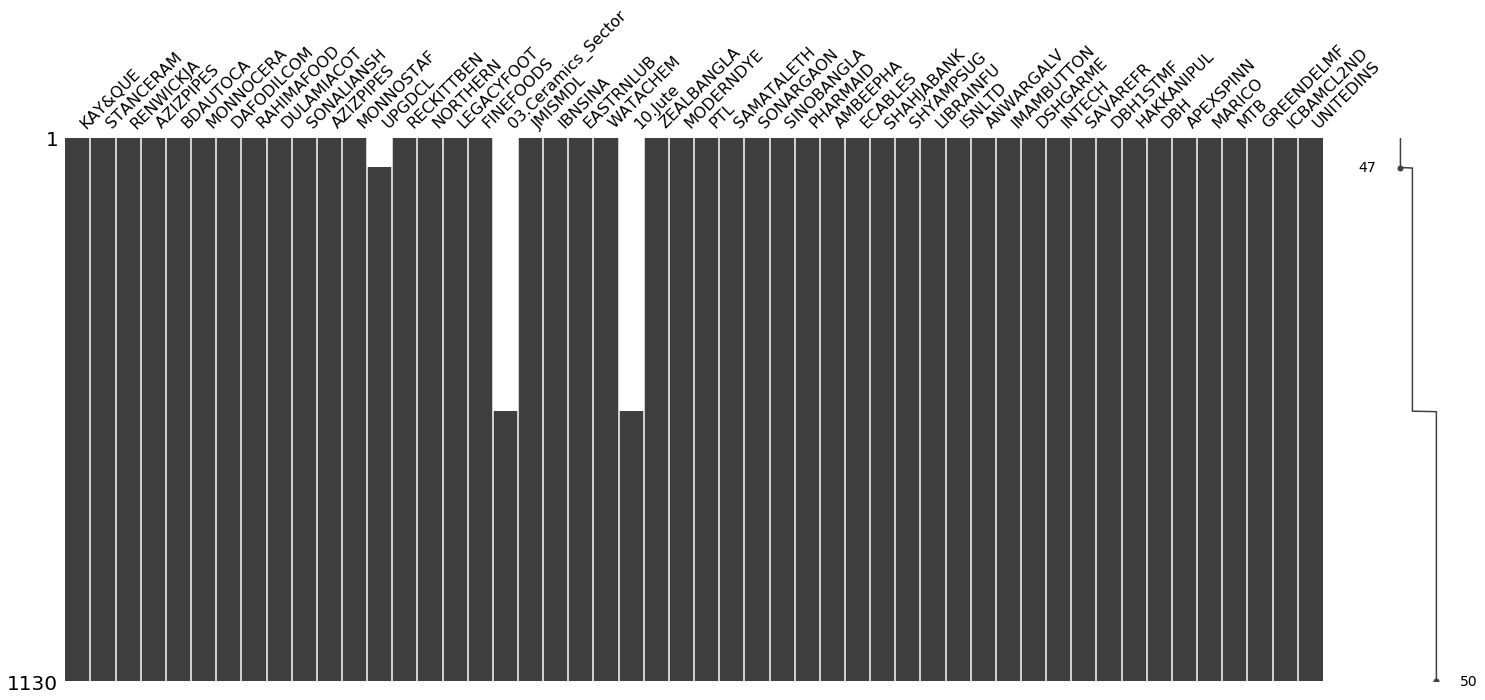

In [12]:
msno.matrix(df_corr_cov)

### Selected Risky Assets

In [46]:
def Portfolio_Return(returns, stds, weights, cov):
    port_df= pd.DataFrame()
    for each in weights:
        port_return = each*returns[0]+(1 - each)*returns[1]
        port_std = np.sqrt(np.square(each*stds[0]) + np.square((1-each)*stds[1]) + 2*each*(1-each)*cov) 
        port_shrp = (port_return - rf_rate ) / port_std
        port_df = port_df.append({'Weights R': each, 'Weights S': 1 - each, 'Portfolio Return': port_return, 'Portfolio Std': port_std, 'Portfolio Sharpe Ratio': port_shrp}, ignore_index=True)
    return port_df

In [47]:
risky_assets = ['UPGDCL', 'MONNOSTAF']
port_assets = df_rss.loc[risky_assets, :]
port_assets

,Annual Return,Standard Deviation,Sharpe Ratio
Symbol,,,
UPGDCL,0.288286,0.365512,0.542489
MONNOSTAF,0.432571,0.607168,0.564211


In [48]:
#port_df = pd.DataFrame()
returns_assets = port_assets['Annual Return']
std_assets = port_assets['Standard Deviation']
cov = df_pivoted[risky_assets].pct_change(1).cov().loc[risky_assets[0], risky_assets[1]]
weights = pd.Series(np.arange(0,1.01,.01))
Portfolio_Return(returns_assets, std_assets, weights, cov)
#weights = pd.Series(np.arange(0,1.01,.01))
#for each in weights:
#    port_return = each*returns_assets[0]+(1 - each)*returns_assets[1]
#    port_std = np.sqrt(np.square(each*std_assets[0]) + np.square((1-each)*std_assets[1]) + 2*each*(1-each)*cov) 
#    port_shrp = (port_return - rf_rate ) / port_std
#    port_df = port_df.append({'Weights R': each, 'Weights S': 1 - each, 'Portfolio Return': port_return, 'Portfolio Std': port_std, 'Portfolio Sharpe Ratio': port_shrp}, ignore_index=True)
# port_df

,Portfolio Return,Portfolio Sharpe Ratio,Portfolio Std,Weights R,Weights S
0,0.432571,0.564211,0.607168,0.00,1.00
1,0.431128,0.567499,0.601108,0.01,0.99
2,0.429685,0.570832,0.595070,0.02,0.98
3,0.428243,0.574211,0.589056,0.03,0.97
4,0.426800,0.577636,0.583066,0.04,0.96
...,...,...,...,...,...
96,0.294058,0.580151,0.351732,0.96,0.04
97,0.292615,0.570722,0.355015,0.97,0.03
98,0.291172,0.561293,0.358408,0.98,0.02
99,0.289729,0.551878,0.361908,0.99,0.01


In [41]:
optimal = port_df.loc[port_df['Portfolio Sharpe Ratio'].idxmax()]
rp_var = (optimal['Portfolio Return'] - rf_rate)/ optimal['Portfolio Std']**2
optimal = optimal.append(pd.Series([rp_var], index=['Risk Premium to VAR']))
optimal

Portfolio Return          0.344557
Portfolio Sharpe Ratio    0.782647
Portfolio Std             0.325252
Weights R                 0.610000
Weights S                 0.390000
Risk Premium to VAR       2.406281
dtype: float64

In [42]:
y = round(optimal['Risk Premium to VAR']/ coeff_A, 2)
y

0.67

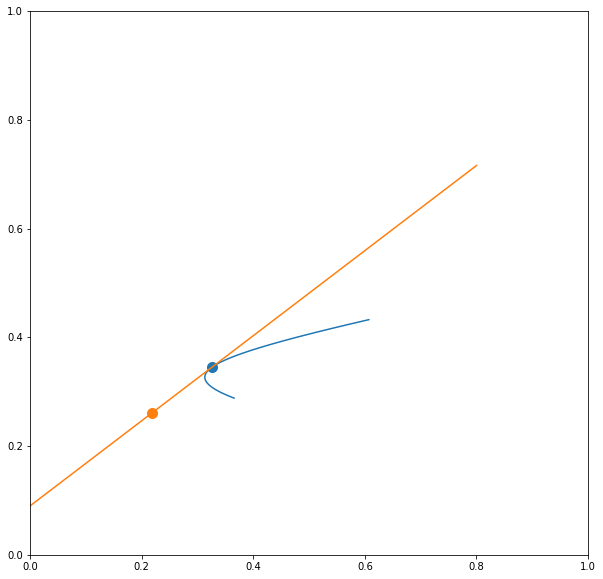

In [43]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 1)
plt.xlim(0,1)
plt.plot(port_df['Portfolio Std'], port_df['Portfolio Return'])
plt.scatter(optimal['Portfolio Std'], optimal['Portfolio Return'], s=100)
polynomial = np.poly1d(np.polyfit([0,optimal['Portfolio Std']], [rf_rate,optimal['Portfolio Return']], 1))
x_axis = np.linspace(0,.80)
y_axis = polynomial(x_axis)
plt.plot(x_axis, y_axis)
plt.scatter(optimal['Portfolio Std']*y,polynomial(optimal['Portfolio Std']*y), s=100)

In [44]:
port_df.to_clipboard()

In [55]:
returns_rf = pd.Series([optimal['Portfolio Return'], rf_rate])
std_rf = pd.Series([optimal['Portfolio Std'], 0])
wt = pd.Series(np.arange(0, 1.81, .01))

Risk_Portfolio_rf = Portfolio_Return(returns_rf, std_rf, wt, cov)
Risk_Portfolio_rf.to_clipboard()

c:\users\rapples\desktop\quantitative\portfolio-analysis\sy-portfolio\venv\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
